In [1]:
experimento = 'Revisar el tema los bucles for for, porque en muchas pruebas he obtenido el mismo resultado exactamente con diferentes modelos y claro iguales muestras.\n'

In [2]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import Modulo_SVM

from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [3]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')
#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [4]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Revisar el tema los bucles for for, porque en muchas pruebas he obtenido el mismo resultado exactamente con diferentes modelos y claro iguales muestras.
 


In [5]:
# Hyperparametros
nTest = 0.2
nSamples = 1000
nTrain = 1-nTest
nSamples =  round(nSamples / nTrain)
num_splits = 10
kernels = ['poly','rbf']

In [14]:
df = data
df = df[:nSamples]

In [7]:
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]

In [15]:
X = df.drop(['act'], axis = 'columns')
y = df.act

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=nTest, random_state=42)

num of samples: 1000
[257, 66, 128, 98, 85, 21, 20, 194, 0, 67, 64, 0]


<BarContainer object of 12 artists>

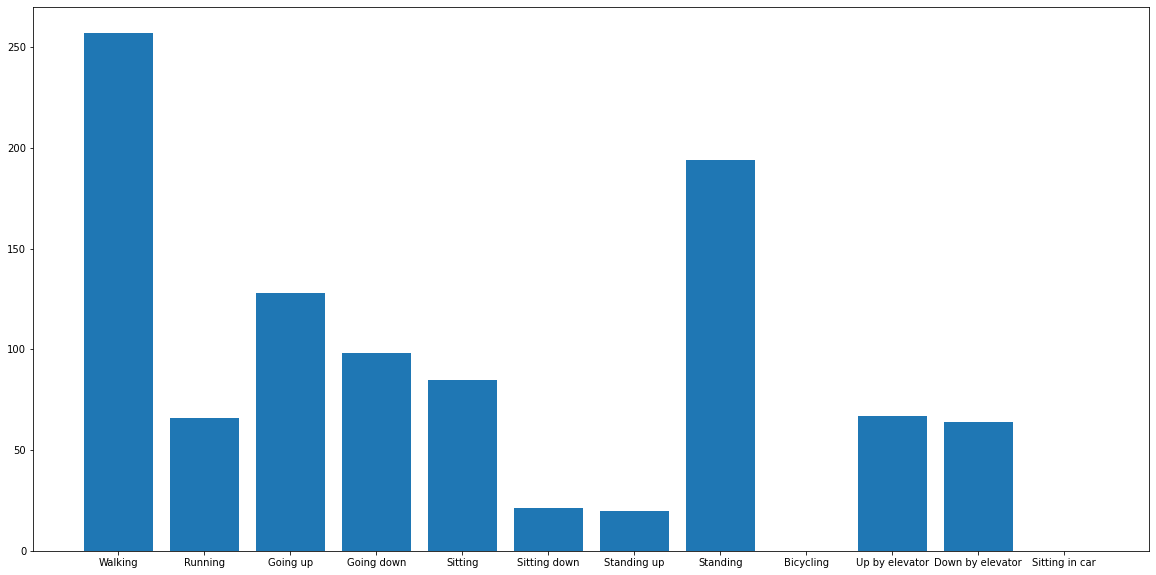

In [10]:
x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']
# x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
#             'Up by elevator',  'Down by elevator']
y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)            

In [11]:
# Modelo que entrenaremos 
# model = SVC(C=0.5,kernel = 'poly', degree=3, gamma='scale', coef0= 4, decision_function_shape='ovo'
#             ,shrinking=True, probability=True, verbose = True, random_state=42)
model = SVC(kernel = 'rbf', decision_function_shape='ovo')

Número de muestras: 1000 // kernel: rbf
Accuracy train en split 1 --> 0.625


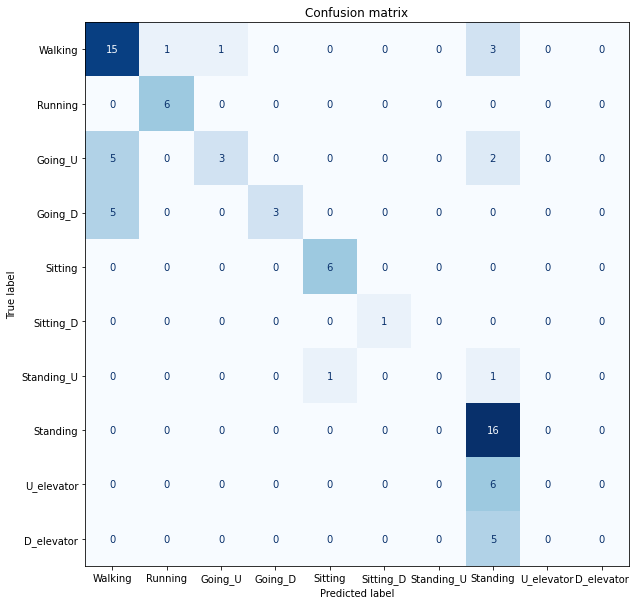

Accuracy train en split 2 --> 0.6


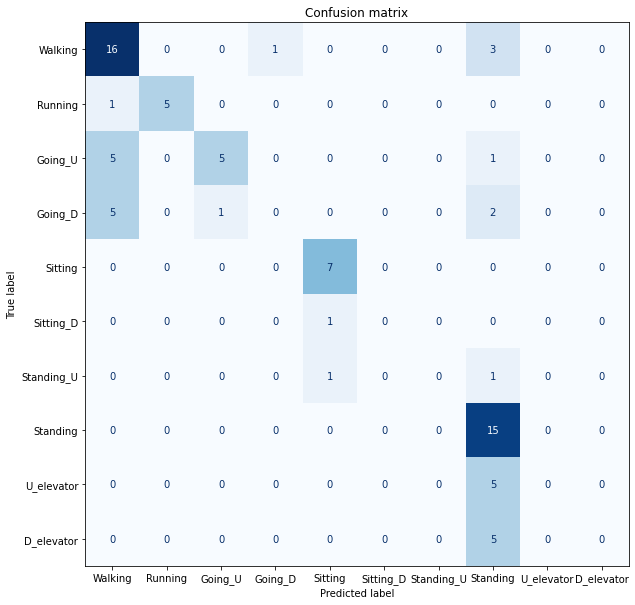

Accuracy train en split 3 --> 0.6125


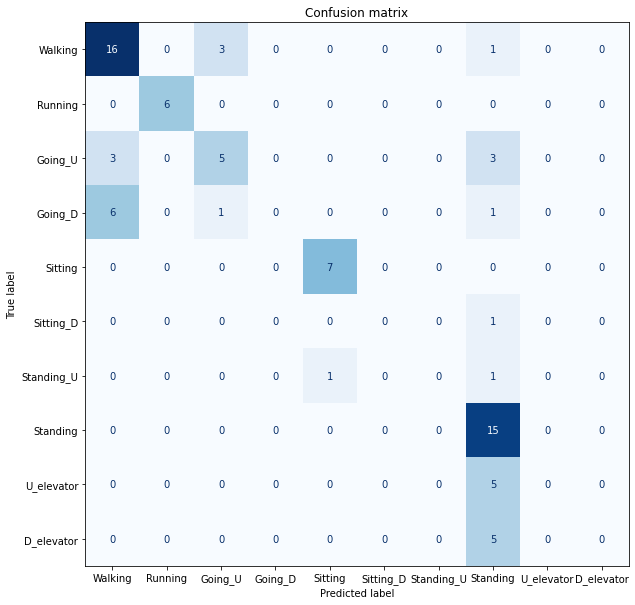

Accuracy train en split 4 --> 0.65


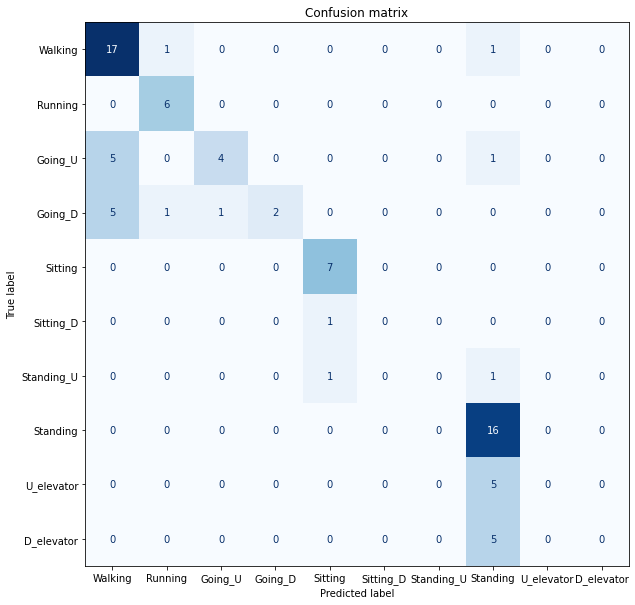

Accuracy train en split 5 --> 0.5875


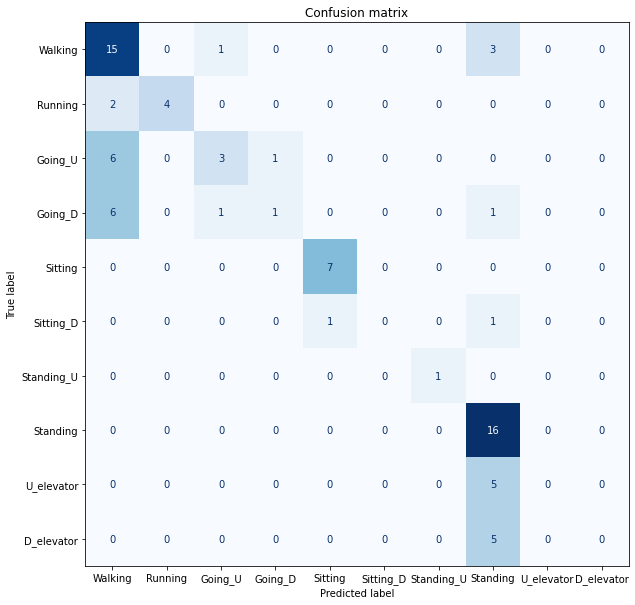

Accuracy train en split 6 --> 0.5625


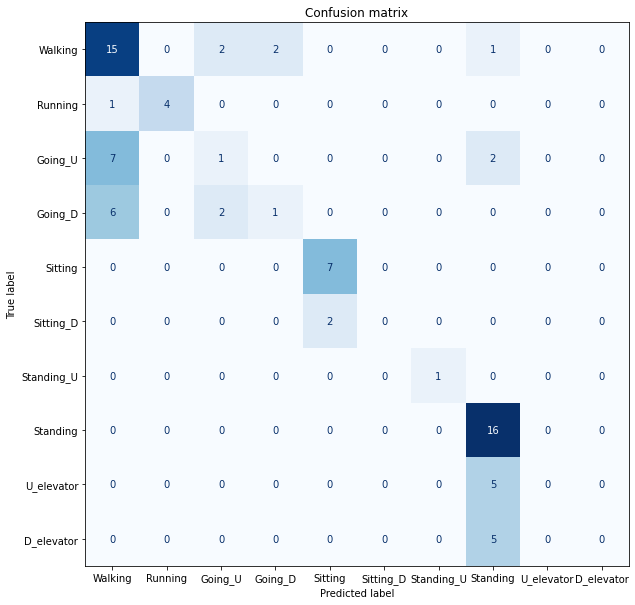

Accuracy train en split 7 --> 0.6


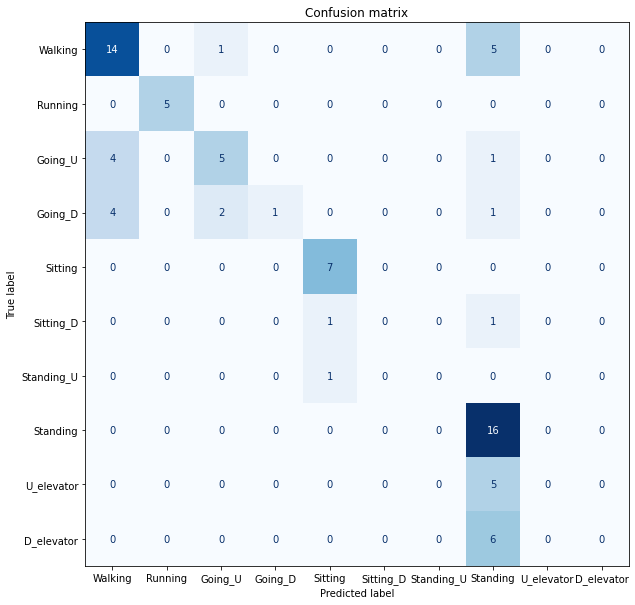

Accuracy train en split 8 --> 0.6


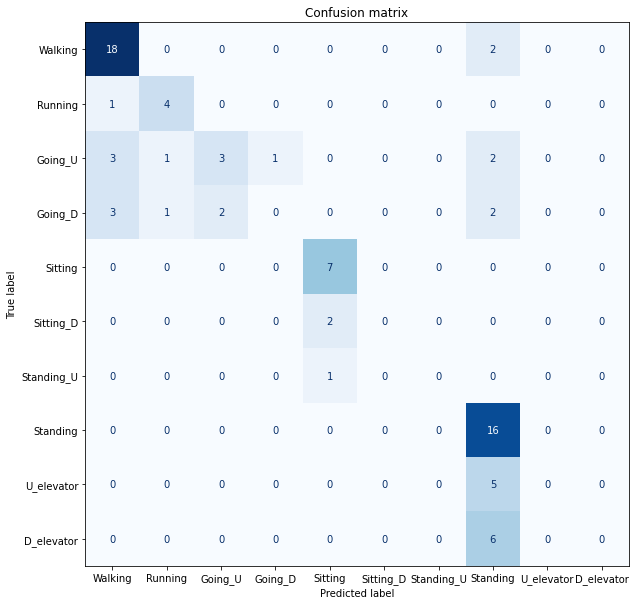

Accuracy train en split 9 --> 0.6125


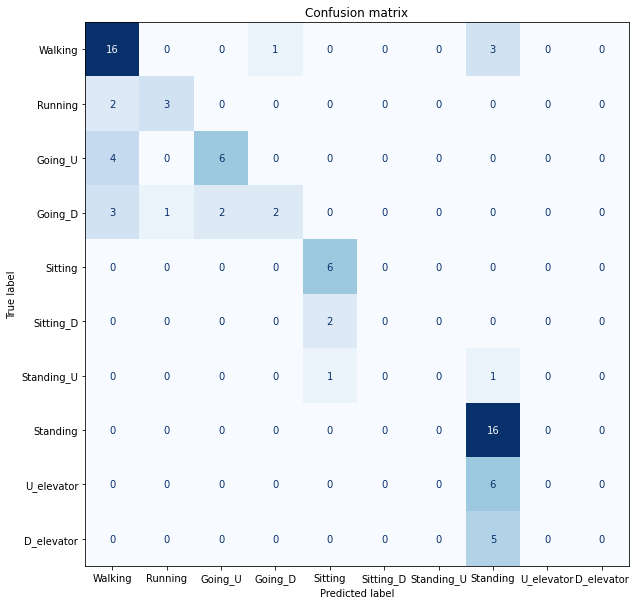

Accuracy train en split 10 --> 0.6375


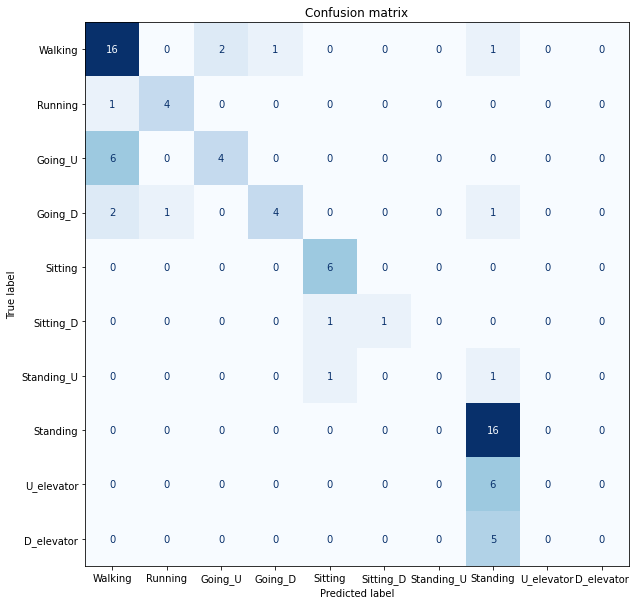

Time: 7.953125s
Accuracy medio: 0.60875 



In [17]:
# #Pruebas sin bucle
# print('\033[5;34m'+'Número de muestras:', nSamples, '// kernel: rbf'+'\033[0;m')
# list_acc, time = Modulo_SVM.modl(model, X_train, y_train, 10)
# mean_acc = np.mean(list_acc)
# print('\033[5;32m'+'Accuracy medio:', mean_acc, '\n'+'\033[0;m')

In [ ]:
print('PRUEBA SATIFACOTRIA DE BUCLES FOR FOR\n')
for samples in range(5000, nSamples+1, 5000):
    print(f'=============================================================================')
    df = data
    df = df[:samples]
    X = df.drop(['act'], axis = 'columns')
    y = df.act
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=nTest, random_state=42)
    for kernel in kernels:
        print(f'\033[5;34mNúmero de muestras: {samples} // kernel: {kernel}\033[0;m')
        
        modelo = SVC(kernel = kernel, decision_function_shape='ovo')
        list_acc, time = Modulo_SVM.modl(modelo, X_train, y_train, 10)
        mean_acc = np.mean(list_acc)

        print(f'\033[5;32mAccuracy medio de test: {mean_acc} \n\033[0;m')

In [ ]:
# Lista de muestras [0, 1, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000]
# lista de tiempos [0, 0, 39718750000, 135718750000, 265937500000, 345343750000, 277421875000, 394828125000, 481390625000, 588859375000, 739046875000, 926046875000, 1129531250000, 1412500000000, 1758062500000, 2197656250000, 2607500000000, 3781156250000, 7050062500000]